In [1]:
#!python --version
#!pip install darts

Python 3.10.4


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.missing_values import missing_values_ratio ,fill_missing_values

In [4]:
df=pd.read_csv('pricesChennai.csv')
#df.head()
#df.describe()
#df.shape

In [98]:
def create_imputed_timeseries(c):
    #c is the column that we plan to forecast
    new_df=df[[c,'23']]
    
    #converting to proper data time object
    new_df['day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
    new_df.drop('23', axis=1, inplace=True)
    new_df.rename(columns = {c:'price'}, inplace = True)
    
    #create Time series object
    rice=TimeSeries.from_dataframe(new_df,time_col='day',value_cols='price')
    
    #impute missing values
    rice_imputed=fill_missing_values(rice)
    return rice,rice_imputed

    

In [91]:
onion_orig,onion_cleaned=create_imputed_timeseries('22')

C:\Users\hp\AppData\Local\Temp\ipykernel_8792\1256536195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
C:\Users\hp\AppData\Local\Temp\ipykernel_8792\1256536195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('23', axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8792\1256536195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

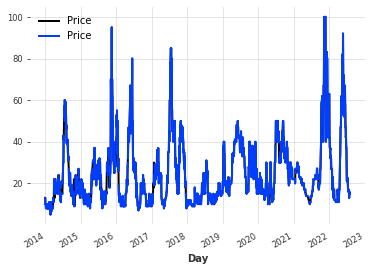

In [97]:
onion_cleaned.plot()
onion_orig.plot()

In [34]:
#rice Prices
new_df=df[['1','23']]
#converting to proper data time object
new_df['Day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
new_df.drop('23', axis=1, inplace=True)
new_df.rename(columns = {'1':'Price'}, inplace = True)
#new_df.dtypes
#new_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_8792\2642033511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
C:\Users\hp\AppData\Local\Temp\ipykernel_8792\2642033511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('23', axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8792\2642033511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [36]:
rice=TimeSeries.from_dataframe(new_df,time_col='Day',value_cols='Price')
rice.plot()

In [53]:
# percentage of missing values in the dataset
missing_values_ratio(rice)

0.11845466155810984

In [85]:
#imputing the missing values using the pandas interpolate function in the backend.
# the data is here imputed in a linear interpolation.
# See more information on here:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
rice_imputed=fill_missing_values(rice)
#rice_imputed.plot()

In [81]:
#new_df['Price'].plot(figsize=(20, 20))

In [80]:
# Watch the imputed chart in large detail (large size plot of the same thing)

# rice_imputed_df=rice_imputed.pd_dataframe()
# rice_imputed_df.plot(figsize=(20, 20))


In [84]:
# rice_imputed.plot()
# rice.plot()